In [3]:
import os
from collections import Counter

# Path ke folder dataset
dataset_dir = './dataset'  # Ganti dengan path dataset Anda

# Membaca dataset
categories = os.listdir(dataset_dir)  # List semua folder di dalam dataset
data_count = {}

# Menghitung jumlah gambar per kategori
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    if os.path.isdir(category_path):  # Pastikan hanya membaca folder
        data_count[category] = len(os.listdir(category_path))

# Menampilkan hasil
print("Jumlah gambar per kategori:")
for category, count in data_count.items():
    print(f"- {category}: {count} gambar")

# Validasi jumlah total dataset
total_images = sum(data_count.values())
print(f"\nTotal jumlah gambar dalam dataset: {total_images}")


Jumlah gambar per kategori:
- cardboard: 403 gambar
- metal: 410 gambar
- paper: 594 gambar
- plastic: 482 gambar

Total jumlah gambar dalam dataset: 1889


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameter
img_height, img_width = 150, 150  # Ukuran gambar yang akan di-resize
batch_size = 32  # Jumlah gambar per batch

# Data Augmentation untuk training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalisasi gambar
    rotation_range=30,         # Rotasi gambar hingga 30 derajat
    width_shift_range=0.2,     # Pergeseran horizontal
    height_shift_range=0.2,    # Pergeseran vertikal
    shear_range=0.2,           # Distorsi shearing
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip horizontal
    validation_split=0.2       # Pembagian dataset (20% untuk validasi)
)

# Data Generator untuk training
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Karena ini klasifikasi multi-kelas
    subset='training'          # Hanya data training
)

# Data Generator untuk validasi
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Karena ini klasifikasi multi-kelas
    subset='validation'        # Hanya data validasi
)

# Menampilkan class labels
class_indices = train_generator.class_indices
print("\nLabel klasifikasi:")
print(class_indices)


Found 1513 images belonging to 4 classes.
Found 376 images belonging to 4 classes.

Label klasifikasi:
{'cardboard': 0, 'metal': 1, 'paper': 2, 'plastic': 3}


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Membuat arsitektur CNN
model = Sequential([
    # Layer konvolusi 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer konvolusi 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer konvolusi 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    Flatten(),

    # Fully connected layer 1
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout untuk mencegah overfitting

    # Fully connected layer (output)
    Dense(4, activation='softmax')  # 4 kelas output
])

# Kompilasi model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Menampilkan ringkasan model
model.summary()

c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Melatih model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Jumlah epoch (dapat ditingkatkan)
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 721ms/step - accuracy: 0.2772 - loss: 1.5930 - val_accuracy: 0.3722 - val_loss: 1.3815
Epoch 2/10
 1/47 ━━━━━━━━━━━━━━━━━━━━ 26s 582ms/step - accuracy: 0.4688 - loss: 1.1286

c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4688 - loss: 1.1286 - val_accuracy: 0.3665 - val_loss: 1.4468
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 695ms/step - accuracy: 0.4162 - loss: 1.3015 - val_accuracy: 0.4034 - val_loss: 1.2196
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6250 - loss: 1.1552 - val_accuracy: 0.4062 - val_loss: 1.2046
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 680ms/step - accuracy: 0.4881 - loss: 1.1242 - val_accuracy: 0.4631 - val_loss: 1.1301
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4062 - loss: 1.0950 - val_accuracy: 0.4716 - val_loss: 1.1141
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 703ms/step - accuracy: 0.5557 - loss: 0.9954 - val_accuracy: 0.4631 - val_loss: 1.1076
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5312 - loss: 0.9719 - val_accuracy: 0.4432 - val_loss: 1.1650
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 692ms/step - accuracy: 0.5943 - loss: 0.9544 - val_accuracy: 0.5398 - val_

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Evaluasi pada data validasi
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.5206 - loss: 1.0763
Validation Loss: 1.0322
Validation Accuracy: 0.5293


In [10]:
# Prediksi pada data validasi
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Kelas prediksi
true_classes = val_generator.classes                # Kelas sebenarnya
class_labels = list(val_generator.class_indices.keys())  # Label kategori

# Classification Report
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.21      0.16      0.18        80
       metal       0.36      0.20      0.25        82
       paper       0.29      0.56      0.39       118
     plastic       0.31      0.15      0.20        96

    accuracy                           0.29       376
   macro avg       0.29      0.27      0.25       376
weighted avg       0.29      0.29      0.27       376




Confusion Matrix:


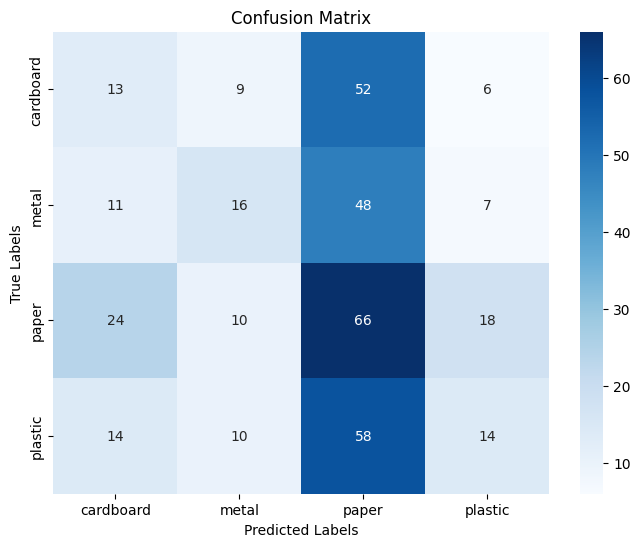

In [11]:
# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

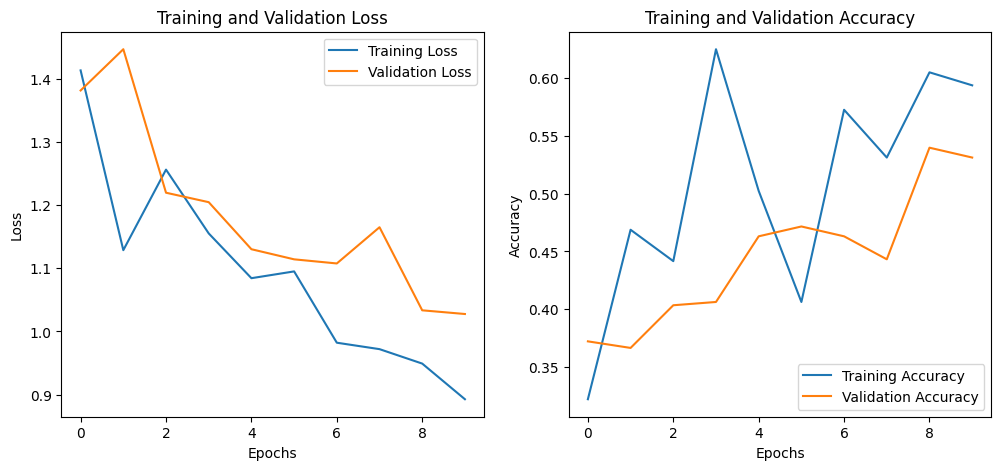

In [12]:
# Plot Training vs Validation Loss and Accuracy
history_dict = history.history

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Arsitektur Model yang Ditingkatkan
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 kelas
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback untuk menghentikan pelatihan jika tidak ada perbaikan
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Mengurangi learning rate jika performa stagnan
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Latih Model dengan Callback
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator,
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4500 - loss: 10.2931 - val_accuracy: 0.2527 - val_loss: 8.0985 - learning_rate: 0.0010
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5648 - loss: 3.2957 - val_accuracy: 0.2872 - val_loss: 8.4996 - learning_rate: 0.0010
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5987 - loss: 1.9226 - val_accuracy: 0.2553 - val_loss: 28.9172 - learning_rate: 0.0010
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5523 - loss: 1.1838 - val_accuracy: 0.2553 - val_loss: 10.6244 - learning_rate: 0.0010
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6075 - loss: 1.0534 - val_accuracy: 0.2580 - val_loss: 6.5803 - learning_rate: 5.0000e-04
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6348 - loss: 0.9385 - val_accuracy: 0.2952 - val_loss: 3.4035 - learning_rate: 5.0000e-04
Epoch 7/30
20/48 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5867 - loss: 1.0053

KeyboardInterrupt: 